Cara Pakai :
1.   pilih/buat URL yg ingin di scrape klik tombol **Play (Run Cell)**
2.   **Run Form nomor 3** untuk mendapatkan data
3.   Klik **Files** di sidebar kiri
4.   Buka/double click **"sports stream.csv"** dan akan muncul di sidebar kanan
5.   Siap digunakan, anda dapat menggunakan **Filter** dan bisa langsung *copy-paste* Schedule ID



1. **Pilih salah satu** untuk URL/Buat URL baru yg ingin di Scrape, **lalu Run**

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/tags/sports-stream/lives"

Streaming

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/15533-jadwal-premier-league"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/1946-jadwal-bri-liga-1"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/8993-jadwal-pegadaian-liga-2-2023-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/8200-jadwal-ligue-1-"

In [ ]:
# URL yang akan Anda scrape
url = "isi_url_mu_lalu_RUN"

Highlight

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/6372-jadwal-serie-a"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/23034-highlights-uefa-europa-league-23-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/14639-highlights-premier-league-23-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/23031-highlights-uefa-europa-conference-league-23-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/21628-highlights-bri-liga-1-2023-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/23031-highlights-uefa-europa-conference-league-23-24"

In [ ]:
# URL yang akan Anda scrape
url = "https://www.vidio.com/sections/22280-highlights-laliga-2023-24"

In [ ]:
# URL yang akan Anda scrape
url = "isi_url_mu_lalu_RUN"

In [ ]:
# @title 2. Run cell ini untuk mendapatkan data { display-mode: "form" }

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Lakukan permintaan HTTP ke URL
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Temukan semua elemen dengan class "home-content"
livestreams = soup.find_all('div', class_='home-content')

sport_streams = []
# Loop melalui setiap elemen dan ekstrak informasi yang Anda inginkan
for livestream in livestreams:
    # Ekstrak tautan dengan mencari elemen 'a' yang memiliki atribut 'href'
    link = livestream.find('a')['href']
    link = "https://www.vidio.com" + link

    # Ekstrak judul dengan mencari elemen dengan class 'home-content__title'
    title_element = livestream.find('div', class_='home-content__title')
    title = title_element.text if title_element else ""

    # Memisahkan teks berdasarkan tanda penghubung (-)
    parts_title = title.split(" - ")

    if len(parts_title) == 2:
        title = parts_title[0]
        event = parts_title[1]
    else:
        title = title  # Biarkan judul seperti apa adanya
        event = ""  # Set event ke string kosong

    # Ekstrak subtitle dengan mencari elemen dengan class 'home-content__subtitle'
    subtitle_element = livestream.find('div', class_='home-content__subtitle')
    subtitle = subtitle_element.text if subtitle_element else ""

    # Memisahkan subtitle dengan " · " sebagai pemisah
    parts_subtitle = subtitle.split(" · ")

    # Menginisialisasi variabel streamer, date, dan time
    streamer = ""
    date = ""
    time = ""

    # Memeriksa apakah ada lebih dari satu bagian setelah pemisahan
    if len(parts_subtitle) > 1:
        # Memisahkan tanggal dan waktu dengan " - "
        date_time_parts = parts_subtitle[1].split(" - ")

        # Memeriksa apakah ada dua bagian setelah pemisahan kedua
        if len(date_time_parts) == 2:
            streamer = parts_subtitle[0]
            date = date_time_parts[0]
            time = date_time_parts[1]
        else:
            # Jika hanya satu bagian setelah pemisahan kedua, itu akan menjadi tanggal
            streamer = parts_subtitle[0]
            date = date_time_parts[0]
    else:
        # Jika hanya satu bagian setelah pemisahan pertama, itu akan menjadi streamer
        streamer = parts_subtitle[0]


    # Gunakan regex untuk mengekstrak schedule_id dari tautan
    schedule_id_match = re.search(r'schedule_id=(\d+)', link)
    if schedule_id_match:
        schedule_id = schedule_id_match.group(1)
    #     print("schedule_id:", schedule_id)
    else:
      schedule_id = ""

    # Gunakan ekspresi reguler untuk mengekstrak highlights_id
    highlights_id_match = re.search(r'/watch/(\d+)-', link)

    # Periksa apakah ada hasil pencocokan
    if highlights_id_match:
        highlights_id = highlights_id_match.group(1)
        # print("Highlights ID:", highlights_id)
    else:
        # print("Highlights ID tidak ditemukan dalam link.")
        highlights_id = ""


    sport_streams.append([schedule_id, title, highlights_id, event, date, time, streamer, link])

dfSports = pd.DataFrame(sport_streams, columns=['Schedule ID', 'Title', 'Highlights ID','Event', 'Date', 'Time', 'Streamer', 'Link'])
dfSports.to_csv('sports streams.csv')


Tampilan akan seperti gambar dibawah :

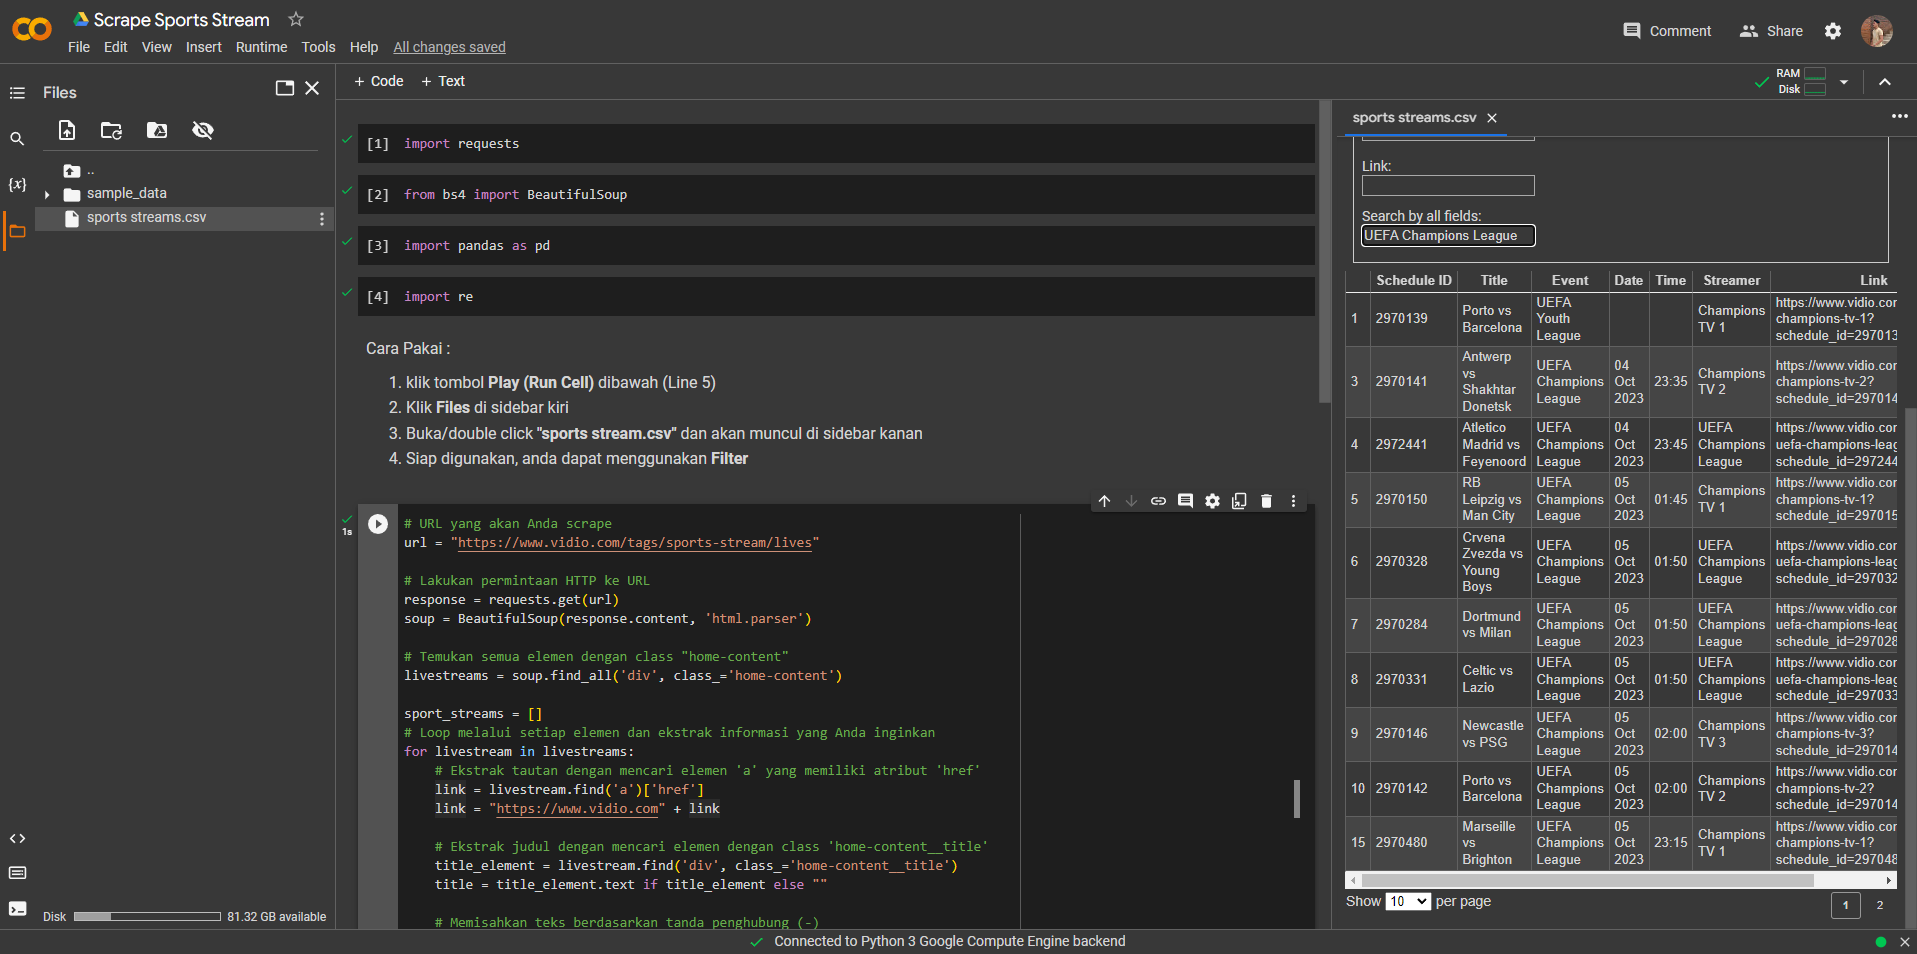